## 로지스틱 회귀
- 분류 문제를 풀 때 주로 사용하는 기법
- 일반적인 회귀와는 다르게 몇 가지 이산적인 값 중 하나를 선택하는 모델
- 이진 분류 문제를 확률로 표현

### 오즈비

- 오즈비(odds ratio) : 어떠한 사건이 일어날 확률을 P(X)로 나타내고 일어나지 않을 확률을 1-P(X)로 나타낼 때 두 개의 비율을 표현하는 수치  
$\frac{P(X)}{1-P(X)}$  
![확률이 올라가면서 오즈비가 상승하는 그래프](../Image/220602_1.png)

### 로짓 함수
- 로짓(logit) 함수 : 오즈비에 상용로그를 붙인 함수  
- 로그를 씌운 오즈비 X값에 확률을 넣으면 로짓함수의 형태가 나타냄  
$logit(P) = ln(\frac{P}{1-P})$  
![로짓함수 그래프](../Image/220602_2.png)

### 시그모이드 함수
- 로짓 함수의 역함수 형태로 z값을 구하면 로지스틱 회귀함수가 됨  
$\sigma(z) = \frac{1}{1-e^{-z}}$  

### 로지스틱 회귀함수 학습
- 와튼 대학교 uva.txt 데이터 사용하여 인터넷 사용자가 뉴비인지 아닌지 구별

In [44]:
import pandas as pd
data_url= "http://www-stat.wharton.upenn.edu/~waterman/DataSets/uva.txt"
df = pd.read_table(data_url)
df[:5]

,who,Newbie,Age,Gender,Household Income,Sexual Preference,Country,Education Attainment,Major Occupation,Marital Status,Years on Internet
0,id74364,0,54.0,Male,$50-74,Gay male,Ontario,Some College,Computer,Other,4-6 yr
1,id84505,0,39.0,Female,Over $100,Heterosexual,Sweden,Professional,Other,Other,1-3 yr
2,id84509,1,49.0,Female,$40-49,Heterosexual,Washington,Some College,Management,Other,Under 6 mo
3,id87028,1,22.0,Female,$40-49,Heterosexual,Florida,Some College,Computer,Married,6-12 mo
4,id76087,0,20.0,Male,$30-39,Bisexual,New Jersey,Some College,Education,Single,1-3 yr


In [45]:
# 분석에 사용하지 않는 열과 같은 의미를 가진 열을 제거(drop)
df.pop('who')
df.pop('Country')
df.pop('Years on Internet')
df.dtypes

Newbie                    int64
Age                     float64
Gender                   object
Household Income         object
Sexual Preference        object
Education Attainment     object
Major Occupation         object
Marital Status           object
dtype: object

In [46]:
# object 타입을 category 타입으로 변환
category_cols = ["Gender", 'Household Income',
                 'Sexual Preference', 'Education Attainment',
                 'Major Occupation', "Marital Status"]

for col in category_cols:
    df[col] = df[col].astype('category')

df.dtypes

Newbie                     int64
Age                      float64
Gender                  category
Household Income        category
Sexual Preference       category
Education Attainment    category
Major Occupation        category
Marital Status          category
dtype: object

In [47]:
# get_dummies를 사용해 데이터프레임을 원핫인코딩 형태로 변환
df_onehot = pd.get_dummies(df)
df_onehot.shape

(19583, 38)

In [48]:
# 결측값 확인, Age 열에만 결측값 존재함을 확인할 수 있다.
df_onehot.isnull().sum()

Newbie                                 0
Age                                  561
Gender_Female                          0
Gender_Male                            0
Household Income_$10-19                0
Household Income_$20-29                0
Household Income_$30-39                0
Household Income_$40-49                0
Household Income_$50-74                0
Household Income_$75-99                0
Household Income_Over $100             0
Household Income_Under $10             0
Sexual Preference_Bisexual             0
Sexual Preference_Gay male             0
Sexual Preference_Heterosexual         0
Sexual Preference_Lesbian              0
Sexual Preference_Transgender          0
Sexual Preference_na                   0
Education Attainment_College           0
Education Attainment_Doctoral          0
Education Attainment_Grammar           0
Education Attainment_High School       0
Education Attainment_Masters           0
Education Attainment_Other             0
Education Attain

In [49]:
# Age 결측값을 평균값으로 채운다.
df_onehot.loc[
    pd.isnull(df_onehot['Age']), "Age"] = df_onehot['Age'].mean()

In [50]:
# Newbie 열은 y_data에 할당하고 나머지는 x_data에 할당
x_data = df_onehot.iloc[:, 1:].values # df_onehot의 2열 ~ 마지막열 x_data로 설정
y_data = df_onehot.iloc[:, 0].values.reshape(-1, 1) # df_onehot의 1열 y_data로 설정, 벡터이기 때문에 2차원으로 만들어줌

x_data.shape, y_data.shape

((19583, 37), (19583, 1))

In [51]:
# x_data에 대해 MinMaxScaler 함수를 사용해 전체 데이터에 대한 스케일링 실시
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_data = min_max_scaler.fit_transform(x_data)

In [52]:
# train-test split 함수를 사용해 데이터셋과 테스트 데이터셋으로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.33, random_state=42
)

X_train.shape, X_test.shape

((13120, 37), (6463, 37))

### LogisticRegression 파라미터
참고 : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- penalty : 패널티 정도를 지정한다. 독립 변수를 없애 간명하게 만들어 과적합 현상을 없애려는 것 (default: l2)
    - 'l1', 'l2', 'elasticnet', 'none'
- C : penalty에 대한 계수 설정, 높을 수록 복잡한 모델에 대한 규제 강화
- solver : 최적화 문제에 사용할 알고리즘, 선택한 패널티에 따라 다르게 적용한다.
    - 'newton-cg' [‘l2’, ‘none’]
    - 'lbfgs' [‘l2’, ‘none’]
    - 'liblinear' [‘l1’, ‘l2’]
    - 'sag' ['l2', 'none']
    - 'saga' [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]
    - 'sag'와 'saga'는 스케일이 거의 동일한 기능에서만 보장된다.
- fit_intercept : 생성된 모델의 절편을 간단히 생성

In [53]:
# LogisticRegression 클래스를 사용해 학습된 모델을 생성
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=True)
logreg.fit(X_train, y_train.flatten())

LogisticRegression()

In [54]:
# 생성된 모델을 통해 실제값을 예측하기 위해 predict 함수 사용
logreg.predict(X_test[:5]) # X_test에 존재하는 값 5개까지 모두 0으로 예측

array([0, 0, 0, 0, 0], dtype=int64)

In [55]:
# 각 값들의 예측값에 대한 확률은 predict_proba로 구할 수 있다.
logreg.predict_proba(X_test[:5])

array([[0.56843258, 0.43156742],
       [0.91112572, 0.08887428],
       [0.79481085, 0.20518915],
       [0.85841562, 0.14158438],
       [0.62764603, 0.37235397]])

#### 분류 문제의 성능 지표
- 로지스틱 회귀는 대표적인 분류 문제를 위한 알고리즘
- 정확도, 정밀도, 민감도, F1 스코어, ROC 커브, 리프트 차트
- 혼동행렬 : 모델의 실제 성능을 측정하기 위해, 예측값이 실제값 대비 얼마나 잘 맞는지 표현하는 기법  
![혼동행렬](../Image/220602_4.png)
- 정확도 : 전체 데이터 개수 대비 정답을 맞춘 데이터의 개수  
$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$
- 정밀도 : 모델이 1이라고 예측할 때 얼마나 잘 맞출지에 대한 비율  
$Precision(PPV) = \frac{TP}{TP+TN}$
- 민감도(재현율) : 실제 1인 값을 가진 데이터를 모델이 얼마나 1이라고 잘 예측했는지에 대한 비율  
$Recall(TPR) = \frac{TP}{TP+FN}$
- F1 스코어 : 정밀도와 민감도의 조화평균 값  
$F_1 = 2\times\frac{Precision\times Recall}{Precision+Recall}$

In [56]:
# 모델의 실제 성능을 측정하기 위해, 혼동행렬을 만든다
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_true = y_test.copy()
y_pred = logreg.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[4487,  275],
       [1350,  351]], dtype=int64)

In [57]:
# 정확도 측정
accuracy_score(y_true, y_pred)

0.7485687761101656

In [58]:
# 정밀도 측정
precision_score(y_true, y_pred)

0.560702875399361

In [59]:
# 민감도 측정
recall_score(y_true, y_pred)

0.20634920634920634

In [60]:
# F1 스코어 측정
f1_score(y_true, y_pred)

0.3016759776536313

## 최근접 이웃
- 최근접 이웃(K-Nearest Neighbors) : 예측하려고 하는 임의의 데이터와 가장 가까운 거리의 데이터 K개를 찾아 다수결에 의해 데이터를 예측하는 방법  
![KNN 예시](../Image/220602_5.png)

### K-NN 장점
- 추가된 데이터의 처리가 쉽고, 예측 결과에 대한 해석도 쉬움
- 사용이 간단하여 훈련 데이터에 대한 훈련 과정이 별도로 필요하지 않음
-  범주를 나눈 기준을 알지 못하더라도 데이터를 분류할 수 있음

### K-NN 단점
- 훈련 데이터 세트의 크기가 너무 크거나 특성(feature)의 개수가 너무 많으면 연산속도가 느려짐
- 비수치 데이터의 유사도를 정의하기가 어렵고 이상치의 영향을 크게 받음
- 서로 다른 특성 값들의 비율을 일정하게 하지 않을 경우 성능이 떨어지기 때문에 같은 스케일(규모)을 갖도록 전처리 하는 과정이 필수

In [61]:
# National Institute of Diabetes and Digestive and Kidney Diseases에서 제공된 당뇨병 진단 장치로부터 나온 데이터와 당뇨병의 여부를 보여줌
diabetes_df = pd.read_csv("./Data/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### diabetes_df 열 구성
- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/(키(m))^2)
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 당뇨병 여부(0 또는 1)

In [62]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 훈련, 시험 데이터 분할
x=diabetes_df.drop('Outcome',axis=1)
y=diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42, stratify=y)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 7 neighbors
knn = KNeighborsClassifier(n_neighbors = 7)

#Fit the classifier to the training data
knn.fit(X_train, y_train)

#Print the accuracy
print(knn.score(X_test, y_test))
print("Accuracy = {}".format(round(knn.score(X_test, y_test),2) * 100)+"%")


0.7305194805194806
Accuracy = 73.0%


In [64]:
#Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9) # 1 ~ 9까지 neighbors 넘파이 배열 설정
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# neighbors를 k에 대입시켜 k값을 변경하면서 알고리즘 정확도 측정
for i, k in enumerate(neighbors):
    
    # K-NN 분류기를 사용
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # X_train과 y_train을 fit 메소드에 넣어 훈련
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
train_accuracy, test_accuracy # train과 test 데이터 훈련 정확도

(array([1.        , 0.85434783, 0.84565217, 0.80869565, 0.78913043,
        0.78478261, 0.78695652, 0.77826087]),
 array([0.67857143, 0.69480519, 0.68506494, 0.70779221, 0.7012987 ,
        0.72402597, 0.73051948, 0.7012987 ]))

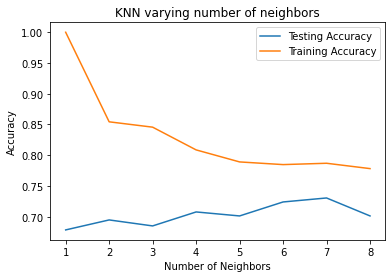

In [65]:
import matplotlib.pyplot as plt

#Generate plot
_ = plt.title('KNN varying number of neighbors')
_ = plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
_ = plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

- Neighbors 7에서 정확도 측정 시 test와 train의 차이가 가장 적은 것을 확인
- 훈련 데이터와 시험 데이터 정확도 차이가 가장 작은 Neighbors 값이 7인 값은 이용해 정확도를 측정

In [78]:
from sklearn.metrics import classification_report

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 혼동행렬을 데이터프레임으로 나타낸 표
pd.crosstab(y_test, y_pred, rownames=['실제'], colnames=['KNN모델'], margins=True)

[[168  33]
 [ 59  48]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       201
           1       0.59      0.45      0.51       107

    accuracy                           0.70       308
   macro avg       0.67      0.64      0.65       308
weighted avg       0.69      0.70      0.69       308



KNN모델,0,1,All
실제,,,
0,168,33,201
1,59,48,107
All,227,81,308


- 당뇨병에 대한 outcome 값에 따른 성능 지표와 정확도를 확인할 수 있음